In [35]:
from pathlib import Path
import numpy as np

from cv2 import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

from typing import List, Tuple
model_selection = "OpenFace"

p = Path("/Users/gregdevyatov/School/ENGG500/lfw/")


In [2]:
in_class_name = "Andy_Roddick"
in_class_embeddings = []
for image_p in (p / in_class_name).iterdir():
    image = cv2.imread(str(image_p))
    try:
        embedding = DeepFace.represent(image, model_name=model_selection)
    except ValueError as err:
        print(f"coulnd't find face in {image_p}")
        continue
    in_class_embeddings.append(np.array(embedding))

coulnd't find face in /Users/gregdevyatov/School/ENGG500/lfw/Andy_Roddick/Andy_Roddick_0004.jpg
coulnd't find face in /Users/gregdevyatov/School/ENGG500/lfw/Andy_Roddick/Andy_Roddick_0010.jpg
coulnd't find face in /Users/gregdevyatov/School/ENGG500/lfw/Andy_Roddick/Andy_Roddick_0005.jpg
coulnd't find face in /Users/gregdevyatov/School/ENGG500/lfw/Andy_Roddick/Andy_Roddick_0002.jpg
coulnd't find face in /Users/gregdevyatov/School/ENGG500/lfw/Andy_Roddick/Andy_Roddick_0015.jpg


In [6]:
embeddings = np.array(in_class_embeddings)

In [9]:
inclass_mean = np.mean(embeddings,0 )

In [13]:
np.mean(embeddings - inclass_mean, 1)

array([ 0.00934303, -0.0027566 ,  0.00618753, -0.00313053, -0.00469384,
       -0.00298807,  0.00403312, -0.00030287, -0.00086113, -0.00483064])

In [15]:
for person in list(p.iterdir())[:30]:
    dists = []
    for image_p in person.iterdir():
        image = cv2.imread(str(image_p))
        try:
            embedding = np.array(DeepFace.represent(image, model_name=model_selection))
        except ValueError as err:
            print(f"coulnd't find face in {image_p}")
            continue

        d = np.linalg.norm(embedding - inclass_mean)
        dists.append(d)
        
    print(dists)

[0.8872248324224656]
[0.7810784202802328]
coulnd't find face in /Users/gregdevyatov/School/ENGG500/lfw/Angela_Lansbury/Angela_Lansbury_0002.jpg
[0.9745154830978915]
[0.686161962071055]
[0.8999132580280961]
[0.8992196924760941, 0.7435496346756729, 0.7483971812795046, 1.1117720205185628]
[0.688364629096879, 0.7373361391538341]
[1.2325664989833223]
[0.5380418838067506]
[0.9078069821278296]
[0.8634633063669684]
coulnd't find face in /Users/gregdevyatov/School/ENGG500/lfw/Alma_Powell/Alma_Powell_0001.jpg
[]
[0.8426747283862009]
[1.1168745264884061]
[0.6519406759606328]
coulnd't find face in /Users/gregdevyatov/School/ENGG500/lfw/Andy_Roddick/Andy_Roddick_0004.jpg
coulnd't find face in /Users/gregdevyatov/School/ENGG500/lfw/Andy_Roddick/Andy_Roddick_0010.jpg
coulnd't find face in /Users/gregdevyatov/School/ENGG500/lfw/Andy_Roddick/Andy_Roddick_0005.jpg
coulnd't find face in /Users/gregdevyatov/School/ENGG500/lfw/Andy_Roddick/Andy_Roddick_0002.jpg
coulnd't find face in /Users/gregdevyatov/Sch

In [6]:
def download_model(destination: Path):
    import urllib.request

    haar_cascadess_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

    contents = urllib.request.urlopen(haar_cascadess_url).read()
    with open(destination, 'wb') as file:
        file.write(contents)

In [5]:
img = cv2.imread(str(test_image))
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)


In [26]:
def crop_faces(img) -> List:
    model_path = Path("haar_model.xml")
    
    if not model_path.exists():
        download_model(model_path)

    face_cascade = cv2.CascadeClassifier(str(model_path))
    
    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    # Draw rectangle around the faces
    cropped_faces = []
    for (x, y, w, h) in faces:
        cropped_faces.append(img[x:x+w, y:y+h, :])
    return cropped_faces

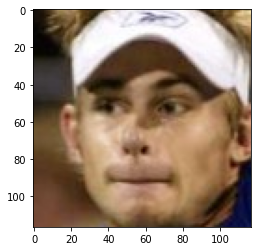

In [28]:
cropped = crop_faces(test_image)[0]
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

In [49]:
def create_template(face_img) -> np.array:
    return np.array(DeepFace.represent(face_img, model_name=model_selection))

In [106]:
def pipeline(image_path: Path) -> np.array:
    image = cv2.imread(str(image_path))
    
    cropped = crop_faces(image)
    # cropped = [image]
    if len(cropped) > 1:
        raise RuntimeError(f"more than one face in {image_path}")
        
    if len(cropped) == 0:
        raise RuntimeError(f"no faces in {image_path}")

    cropped = cropped[0]
    
    try:
        template = create_template(cropped)
    except ValueError as err:
        print(f"Couldn't find face in {image_path}")
        return None
    return template

In [107]:
def compare(template_path: Path, probe_path: Path, threshold = 1.0) -> Tuple[float, bool]:
    template = pipeline(template_path)
    probe = pipeline(probe_path)
    dist = np.linalg.norm(template - probe)
    
    return dist, dist < threshold
    

In [108]:
test_image_p

PosixPath('/Users/gregdevyatov/School/ENGG500/lfw/Andy_Roddick/Andy_Roddick_0001.jpg')

In [118]:
probe = Path('/Users/gregdevyatov/School/ENGG500/lfw/Al_Pacino/Al_Pacino_0003.jpg')
person = Path('/Users/gregdevyatov/School/ENGG500/lfw/Al_Pacino/Al_Pacino_0002.jpg')
other_person = Path('/Users/gregdevyatov/School/ENGG500/lfw/Alberto_Fujimori/Alberto_Fujimori_0001.jpg')

<Figure size 432x288 with 0 Axes>

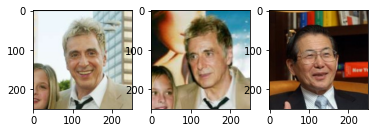

In [119]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,3) 

axarr[0].imshow(cv2.cvtColor(cv2.imread(str(probe)), cv2.COLOR_BGR2RGB))
axarr[1].imshow(cv2.cvtColor(cv2.imread(str(person)), cv2.COLOR_BGR2RGB))
axarr[2].imshow(cv2.cvtColor(cv2.imread(str(other_person)), cv2.COLOR_BGR2RGB))

In [120]:
compare(person, probe)

(0.5008295514312491, True)

In [121]:
compare(person, other_person)

(1.0586671401487155, False)